## HABUMUGISHA Emmanuel
### 225229109

## Lab 9 : Image Classification using CNN for CIFAR-10 Data

#### Step : 1

In [1]:

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D,MaxPooling2D
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

#### Step : 2

In [3]:

(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print('x_train shape:',x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


#### Step : 3

In [4]:
x_train[5000].shape

(32, 32, 3)

#### Step : 4

In [5]:
print(y_train[444])

[9]


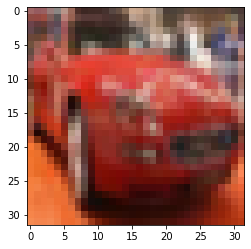

In [21]:
plt.imshow(x_train[5])

##### Step : 5

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
num_classes=10
y_train=keras.utils.to_categorical (y_train,num_classes)
y_test=keras.utils.to_categorical (y_test,num_classes)

In [9]:
y_train[4]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#### Step : 6

In [10]:
x_train=x_train.astype('float32')

x_test=x_test.astype('float32')
x_train /=255
x_test /=255

#### Step : 7

In [11]:

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define the CNN architecture
model = Sequential()

model.add(Conv2D(32, (5, 5), strides=(2, 2), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), strides=(2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))



In [12]:
import tensorflow as tf
print(help(tf.keras.optimizers.Adam))


Help on class Adam in module keras.src.optimizers.adam:

class Adam(keras.src.optimizers.optimizer.Optimizer)
 |  Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, weight_decay=None, clipnorm=None, clipvalue=None, global_clipnorm=None, use_ema=False, ema_momentum=0.99, ema_overwrite_frequency=None, jit_compile=True, name='Adam', **kwargs)
 |  
 |  Optimizer that implements the Adam algorithm.
 |  
 |  Adam optimization is a stochastic gradient descent method that is based on
 |  adaptive estimation of first-order and second-order moments.
 |  
 |  According to
 |  [Kingma et al., 2014](http://arxiv.org/abs/1412.6980),
 |  the method is "*computationally
 |  efficient, has little memory requirement, invariant to diagonal rescaling of
 |  gradients, and is well suited for problems that are large in terms of
 |  data/parameters*".
 |  
 |  Args:
 |    learning_rate: A `tf.Tensor`, floating point value, a schedule that is a
 |      `tf.keras.optimizers.sched

In [16]:
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.optimizers import legacy




#### Step 8 : 9

In [18]:
# Compile the model with RMSprop optimizer and categorical_crossentropy loss
from keras.optimizers import RMSprop
optimizer =tf.keras.optimizers.legacy.RMSprop(learning_rate=0.0005, decay=1e-6)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
batch_size = 32
epochs = 15
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, shuffle=True)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0

### Part -II Model Improvements

In [20]:
# Define the more complicated CNN architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.0005, decay=1e-6)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary and parameter count
model.summary()
print("Total Parameters:", model.count_params())

# Train the model for 5 epochs
batch_size = 64
epochs = 5
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, shuffle=True)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 256)         0         
 g2D)                                                 